# 03: Gaussian distribution

## 1. Implement the temperature measurement from lecture.

(Problem curtesy of Jakob Knollmüller)

Let's code up the problem that we discussed in lecture today!

**Prior:** 

$$P(x) = \mathcal{N}(x | x_0 , T), x_0 = 295, T=3^2$$

**Measurement noise**

$$P(n) =  \mathcal{N}(x | 0,1)$$

1a) Draw a true temp from the prior distribution, 

$$x_\mathrm{true} \sim \mathcal{P}(x),$$

a noise realization

$$n \sim  \mathcal{P}(n|0,N=1^2),$$

and generate data by adding the true temperature and the measurement noise:

$$y = x_\mathrm{true} + n.$$

In [148]:
from scipy.stats import Normal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
'''
Your
'''

Text(0, 0.5, 'Measured temperature (K)')

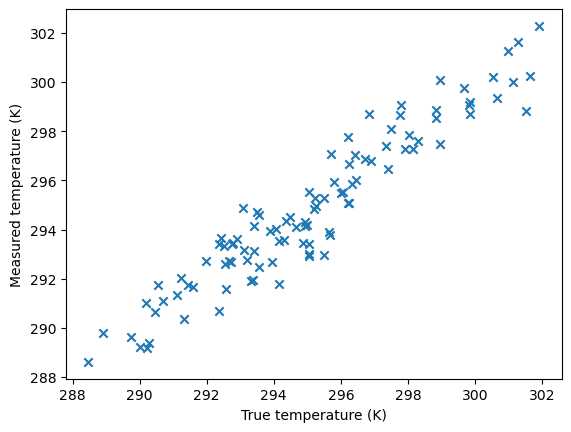

Note, for the theory we worked out in lecture, we considered just one $(x,y)$ pair, but in the plot above we show a range of values to indicate the 

1b) Plot the prior distribution and indicate the data and ground truth as vertical lines

1c) Calculate the posterior mean and variance and include the posterior distribution on the plot

We solved for this in lecture:
$$\mu_\mathrm{post} = \frac{\frac{1}{N} y + \frac{1}{T} x_0}{\frac{1}{N} + \frac{1}{T}} $$
$${\sigma^{2}}_\mathrm{post} = \frac{1}{\frac{1}{N} + \frac{1}{T}},$$

where $N$ = variance on the measurement and $T$ is the variance on the prior.



**What have we learned?**

Purple is always between grey and black, but closer to grey (the meas data) b/c the noise level on the measurement process is much smaller than the noise level on the prior.

d) Repeat for various noise levels (but constant true temp) and discuss your findings

Constant true temperature means I keep xi fixed, but then consider differnt noise levels
added on top (so play with increasing and decreasing $N$)

What do I expect the answer to be?

- As N decreases, $y$ carries more info of the true measurement process, so I'll expect the posterior to get closer to y
- For $N$ increases by a lot, then I think the measurement will have no hope and the posterior will be identical to the prior

Try $\sigma^2 = 0.1, 1, 10, 100$

Note, on this plot the _true_ value for $x$ will remain the smae (e.g, the dashed pink line), but the measured value $y$ will change, so probably the most convenient visualization will be to have 5 subpanels side-by-side



**Does your A make sense?**

1e) For a sample of 100 $(x,y)$ values, plot the posterior mean vs. the true value for the different noise levels you considered in (d)

**Bonus:** How does the mean squared error compare for the meas vs. the posterior mean? What's the relative improvement for the noise levels?

### Fun research connection: 

Does knowing about the noise of the data generating process help in ML as well?
-> Yes it does!

Prof. Shira Nemirovsky-Rotman (Haifa) adds the noise level as an extra condition to the NN

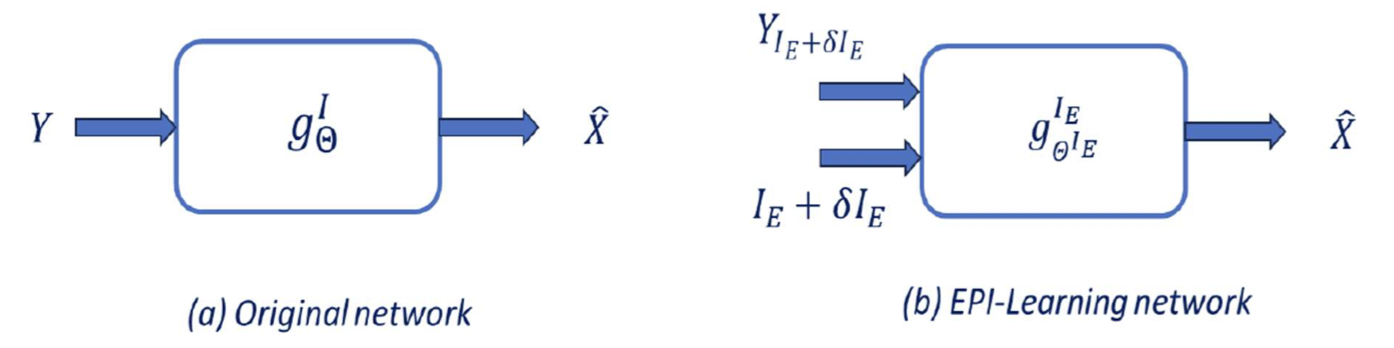

See the talk she gave in Munich last month [here](https://indico.ph.tum.de/event/7932/contributions/10743/attachments/6918/9621/Rotman_slides.pdf)


And for an example in particle physics Prof. Aishik Ghosh (GA Tech) adds a noise of the corrupton to a NN, see [https://arxiv.org/pdf/2105.08742](2105.08742).

These ideas are closely related to **simulation based inference** (which we'll discuss more on Thursday)!

## 2. Statistical combination of the results

In [159]:
mu_atlas  = 172.71
std_atlas = 0.48

mu_cms  = 172.52
std_cms = 0.42


In [160]:
var_comb = 1 / (1 / std_atlas**2 + 1/std_cms**2 )

In [163]:
mu_comb =  var_comb * (mu_atlas / std_atlas**2 + mu_cms / std_cms**2)
mu_comb

172.60238938053098

In [161]:
np.sqrt(var_comb)

np.float64(0.31608221177688867)